In [1]:
# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd
from keras.layers import *
from keras import backend as K
from keras.models import Model
import imageio,os
from keras.datasets import mnist
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
from keras.models import Sequential
import pywt

%matplotlib inline

Using TensorFlow backend.


In [2]:
batch_size=100
latent_dim=10
epochs=5
num_classes=10
img_dim=28
filters=16
intermediate_dim=256

BatchNorm = True  # 是否批量归一化
number = 3000  # 每类样本的数量  1000:0.32,  10000:0.68,  20000:0.7105   30000:81
length =6400   # 信号长度  16384=128*128
normal = False  # 是否标准化
enc=True     #256000/6400=40  小于3000，所以要做数据增强
enc_step=500
rate = [0.8, 0.1, 0.1]  # 训练集验证集测试集划分比例,之和为1

In [12]:
a=np.load('./data_set/test_x.npy')
a

array([[[ 2.87390052e-01,  1.31929260e-01,  4.03487884e-03, ...,
         -4.46530455e-02,  1.73153035e-01,  3.53758163e-01],
        [-2.50287650e-01, -3.34760777e-01, -3.66257926e-01, ...,
         -3.54357103e-01, -3.48543772e-01,  2.20779644e-01],
        [-1.70730264e-01, -1.67021170e-01,  1.25644519e-01, ...,
          3.05195135e-01, -1.39077269e-01,  1.91880501e-01],
        ...,
        [ 9.74367600e-01,  3.91415407e-01,  3.58067202e+00, ...,
          3.88795892e-01, -6.28241285e-02,  3.53436582e-01],
        [-3.35462739e-01,  4.14124840e-01,  2.47490806e-01, ...,
         -2.49097091e-01,  5.54905144e-01, -2.00582212e-01],
        [ 1.45483618e-01,  5.03346975e-01,  2.36521009e-01, ...,
         -6.11545957e-01, -2.88709381e-01,  5.21026667e-01]],

       [[-8.83390133e-02, -1.52817191e-01,  1.85012261e-02, ...,
          3.69499095e-03,  3.08133197e-02,  1.21822408e-01],
        [-1.22209125e-01,  1.89755365e-04, -6.10989451e-02, ...,
          1.18404354e-02,  3.58262112e


## 1 加载据集

In [2]:
(x_train, y_train_), (x_test, y_test_) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((-1, img_dim, img_dim, 1))
x_test = x_test.reshape((-1, img_dim, img_dim, 1))
print(x_train.shape)
print(y_train_.shape)
print(x_test.shape)
y_train_

NameError: name 'img_dim' is not defined

### 1.1加载振动信号

In [3]:
path_training = r"F:\paderborn dataset\start_data\training_dataset\N09_M07_F10\all"
path_testing = r"F:\paderborn dataset\start_data\training_dataset\N09_M07_F10\all"
x_train1, y_train1, x_valid1, y_valid1, x_test1, y_test1=preprocess.prepro(d_path=path_training,d_path1=path_testing, length=length,number=number,normal=normal,rate=rate,enc=enc, enc_step=enc_step)
print(x_train1.shape)

train_path: F:\paderborn dataset\start_data\training_dataset\N09_M07_F10\all
test_path: F:\paderborn dataset\start_data\training_dataset\N09_M07_F10\all


D:\app\anaconda20183\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
D:\app\anaconda20183\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

\\\\\\\\\\\\\\\\\\\\ train_one-hot \\\\\\\\\\\\\\\\\\\\
\\\\\\\\\\\\\\\\\\\\ test_one-hot \\\\\\\\\\\\\\\\\\\\


ValueError: cannot copy sequence with size 6400 to array axis with dimension 2

## 定义小波函数

In [27]:
def wt_f(data,wavelet='db2',mode='symmetric',maxlevel=3):
    wp_out=pywt.WaveletPacket(data,wavelet,mode,maxlevel)
    a=wp_out['a'].data
    b=wp_out['d'].data
    return wp_out

In [38]:
# x=x_train1[1,:]
x_train, x_valid, x_test = x_train1[:, :, np.newaxis], x_valid1[:, :, np.newaxis], x_test1[:, :, np.newaxis]
# 输入数据的维度  input_shape是静态的
input_shape = x_train.shape[1:]
print(x_train.shape)
input_shape

(16800, 6400, 1)


(6400, 1)

In [29]:
input_shape

(6400, 1)

(3201,)
(3201,)
(802,)
**************************************************
(1602,)
(6402,)


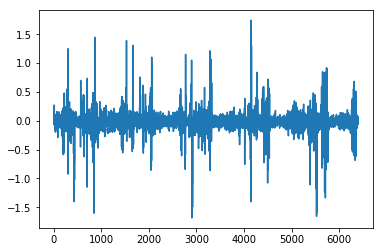

In [22]:
# X=plot_data.reshape(len(plot_data),).tolist()
wp=wt_f(data=x,wavelet='db2',mode='symmetric',maxlevel=3)
print(wp['a'].data.shape)     
print(wp['d'].data.shape)  

wp_1=wt_f(data=wp['a'].data,wavelet='db2',mode='symmetric',maxlevel=3)
print(wp_1['aa'].data.shape)
print('*'*50)

new_wp = pywt.WaveletPacket(data=None, wavelet='db2', mode='symmetric')
new_wp['aa'] = wp['aa']#低频信号
print(wp['aa'].data.shape)     
new_wp['ad'] = wp['ad']#高频信号0.0
new_wp['da'] = wp['da']#低频信号
new_wp['dd'] = wp['dd']#高频信号
a=new_wp.reconstruct(update=True)
print(a.shape)
plt.plot(range(len(a)),a)
plt.show()

In [5]:
# img_dim1=80
# print(x_train1.shape)
# print(x_test1.shape)
# print(x_valid1.shape)
# print(y_train1)
# print('*'*50)
# x_train = x_train1.reshape((-1, img_dim1, img_dim1, 1))
# x_valid = x_valid1.reshape((-1, img_dim1, img_dim1, 1))
# x_test = x_test1.reshape((-1, img_dim1, img_dim1, 1))
# print(x_train.shape)
# print(x_test.shape)
# print(x_valid.shape)

## 卷积（编码器）

In [6]:
# model=Sequential()
# model.add(Conv2DTranspose(filters=filters,kernel_size=3,strides=1,padding='same'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(LeakyReLU(0.2))

# model.add(Conv2DTranspose(filters=filters,kernel_size=3,strides=1,padding='same'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(LeakyReLU(0.2))
x=Input(shape=(img_dim,img_dim,1))
h=x
filters*=2
h=Conv2DTranspose(filters=filters,kernel_size=3,strides=2,padding='same')(h)
h=MaxPooling2D(pool_size=2)(h)
h=ELU(0.2)(h)
h=Conv2DTranspose(filters=filters,kernel_size=3,strides=1,padding='same')(h)
h=MaxPooling2D(pool_size=2)(h)
h=ELU(0.2)(h)
filters //= 2
h=Conv2DTranspose(filters=filters,kernel_size=3,strides=2,padding='same')(h)
h=MaxPooling2D(pool_size=2)(h)
h=ELU(0.2)(h)
h=Conv2DTranspose(filters=filters,kernel_size=3,strides=1,padding='same')(h)
h=MaxPooling2D(pool_size=2)(h)
h=ELU(0.2)(h)

Instructions for updating:
Colocations handled automatically by placer.


## 特征拾取

In [7]:
h4=h
h = ELU(0.2)(h4)
h_shape = K.int_shape(h)[1:]
h = Flatten()(h)
z_mean = Dense(latent_dim)(h) # p(z|x)的均值
z_log_var = Dense(latent_dim)(h) # p(z|x)的方差
encoder = Model(x, z_mean) # 通常认为z_mean就是所需的隐变量编码
z = Input(shape=(latent_dim,))
h = z
h = Dense(np.prod(h_shape))(h)
h = Reshape(h_shape)(h)

## 反卷积（解码器）

In [8]:
filters=16
filters*=2
h = Conv2DTranspose(filters=filters,kernel_size=3,strides=1,padding='same')(h)
#     h=MaxPooling2D(pool_size=2)(h)
h = ELU(0.2)(h)
h = Conv2DTranspose(filters=filters,kernel_size=3,strides=2,padding='same')(h)
#     h=MaxPooling2D(pool_size=2)(h)
h = ELU(0.2)(h)
filters //= 2
h = Conv2DTranspose(filters=filters,kernel_size=3,strides=1,padding='same')(h)
#     h=MaxPooling2D(pool_size=2)(h)
h = ELU(0.2)(h)
h = Conv2DTranspose(filters=filters,kernel_size=3,strides=2,padding='same')(h)
#     h=MaxPooling2D(pool_size=2)(h)
h = ELU(0.2)(h)


In [9]:
x_recon = Conv2DTranspose(filters=1,kernel_size=3,activation='sigmoid',padding='same')(h)
decoder = Model(z, x_recon) # 解码器
generator = decoder

z = Input(shape=(latent_dim,))
y = Dense(intermediate_dim, activation='relu')(z)
y = Dense(num_classes, activation='softmax')(y)
classfier = Model(z, y) # 隐变量分类器

## 重参数技巧

In [10]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim))
    return z_mean + K.exp(z_log_var / 2) * epsilon

# 重参数层，相当于给输入加入噪声
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])
x_recon = decoder(z)
y = classfier(z)

In [11]:
class Gaussian(Layer):
    """这是个简单的层，定义q(z|y)中的均值参数，每个类别配一个均值。
    然后输出“z - 均值”，为后面计算loss准备。
    """
    def __init__(self, num_classes, **kwargs):
        self.num_classes = num_classes
        super(Gaussian, self).__init__(**kwargs)
    def build(self, input_shape):
        latent_dim = input_shape[-1]
        self.mean = self.add_weight(name='mean',shape=(self.num_classes, latent_dim),initializer='zeros')
    def call(self, inputs):
        z = inputs # z.shape=(batch_size, latent_dim)
        z = K.expand_dims(z, 1)
        return z - K.expand_dims(self.mean, 0)
    def compute_output_shape(self, input_shape):
        return (None, self.num_classes, input_shape[-1])

## 损失函数

In [12]:
gaussian = Gaussian(num_classes)
z_prior_mean = gaussian(z)


# 建立模型
vae = Model(x, [x_recon, z_prior_mean, y])

# 下面一大通都是为了定义loss
z_mean = K.expand_dims(z_mean, 1)
z_log_var = K.expand_dims(z_log_var, 1)

lamb = 2.5 # 这是重构误差的权重，它的相反数就是重构方差，越大意味着方差越小。
xent_loss = 0.5 * K.mean((x - x_recon)**2, 0)
kl_loss = - 0.5 * (z_log_var - K.square(z_prior_mean))
kl_loss = K.mean(K.batch_dot(K.expand_dims(y, 1), kl_loss), 0)
cat_loss = K.mean(y * K.log(y + K.epsilon()), 0)
vae_loss = lamb * K.sum(xent_loss) + K.sum(kl_loss) + K.sum(cat_loss)


vae.add_loss(vae_loss)
vae.compile(optimizer='adam')
vae.summary()
vae.fit(x_train,shuffle=True,epochs=epochs,batch_size=batch_size,validation_data=(x_test, None),verbose=2)
plot_model(model=vae, to_file='vae_keras_cluster.png', show_shapes=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_transpose_1 (Conv2DTrans (None, 56, 56, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 28, 28, 32)   0           conv2d_transpose_1[0][0]         
__________________________________________________________________________________________________
elu_1 (ELU)                     (None, 28, 28, 32)   0           max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
conv2d_tra

ValueError: ('Error when checking model target: expected no data, but got:', array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical
 
labels = y_test_
lb = LabelBinarizer()
labels = lb.fit_transform(labels) # transfer label to binary value
labels = to_categorical(labels) # transfer binary label to one-hot. IMPORTANT
score = vae.evaluate(x=x_test,y=labels, batch_size=128)
# y_test_.shape
score

In [ ]:
means = K.eval(gaussian.mean)
x_train_encoded = encoder.predict(x_train)
y_train_pred = classfier.predict(x_train_encoded).argmax(axis=1)
x_test_encoded = encoder.predict(x_test)
y_test_pred = classfier.predict(x_test_encoded).argmax(axis=1)

## 聚类作图

In [ ]:
def cluster_sample(path, category=0):
    """观察被模型聚为同一类的样本
    """
    n = 8
    print('*'*50)
    figure = np.zeros((img_dim * n, img_dim * n))
    idxs = np.where(y_train_pred == category)[0]
    print(idxs.shape)
    print('*'*50)
    for i in range(n):
        for j in range(n):
            digit = x_train[np.random.choice(idxs)]
            digit = digit.reshape((img_dim, img_dim))
            figure[i * img_dim: (i + 1) * img_dim,
            j * img_dim: (j + 1) * img_dim] = digit
    imageio.imwrite(path, figure * 255)


def random_sample(path, category=0, std=1):
    """按照聚类结果进行条件随机生成
    """
    n = 8
    figure = np.zeros((img_dim * n, img_dim * n))
    for i in range(n):
        for j in range(n):
            noise_shape = (1, latent_dim)
            z_sample = np.array(np.random.randn(*noise_shape)) * std + means[category]
#             通过随机生成z_sample，解码x_recon
            x_recon = generator.predict(z_sample)
            digit = x_recon[0].reshape((img_dim, img_dim))
            figure[i * img_dim: (i + 1) * img_dim,
            j * img_dim: (j + 1) * img_dim] = digit
    imageio.imwrite(path, figure * 255)

In [ ]:
if not os.path.exists('samples'):
    os.mkdir('samples')

for i in range(10):
    cluster_sample(u'samples/聚类类别_%s.png' % i, i)
    random_sample(u'samples/类别采样_%s.png' % i, i)
    
right = 0.
for i in range(10):
    print('%'*50)
    print(y_train_)
    print('%'*50)
    _ = np.bincount(y_train_[y_train_pred == i])
    right += _.max()

print ('train acc: %s' % (right / len(y_train_)))


right = 0.
for i in range(10):
    _ = np.bincount(y_test_[y_test_pred == i])
    right += _.max()

print ('test acc: %s' % (right / len(y_test_)))